This notebook allows you to visualize exploration and exploitation statistics for the Exploration in Malmo Continuous Mountain Cart EMC^2 experiment. make sure your data is in the run_saves/ folder.

In [2]:
import numpy as np
import os
import pylab
import seaborn
import scipy.stats as sp
import pickle
import matplotlib.pyplot as plt
import imageio
from scipy.spatial import distance
import json
from collections import OrderedDict
import os.path as osp
import pandas as pd
import copy
import scipy.stats as ss
DIV_LINE_WIDTH = 50

In [3]:
# Global vars for tracking and labeling data at load time.
exp_idx = 0
units = dict()

def get_all_runs(logdir, condition=None):
    #print(logdir)
    """
    Recursively look through logdir for output files produced by
    spinup.logx.Logger. 

    Assumes that any file "progress.txt" is a valid hit. 
    """
    global exp_idx
    global units
    datasets = []
    for root, _, files in os.walk(logdir):
        #print(root)
        if 'progress.txt' in files:
            print(root)
            exp_name = None
            try:
                config_path = open(os.path.join(root,'config.json'))
                config = json.load(config_path)
                if 'exp_name' in config:
                    exp_name = config['exp_name']
                    
            except:
                print('No file named config.json')
            condition1 = condition or exp_name or 'exp'
            condition2 = condition1 + '-' + str(exp_idx)
            exp_idx += 1
            if condition1 not in units:
                units[condition1] = 0
            unit = units[condition1]
            units[condition1] += 1

            exp_data = pd.read_table(os.path.join(root,'progress.txt'))
            performance = 'AverageTestEpRet' if 'AverageTestEpRet' in exp_data else 'AverageEpRet'
            exp_data.insert(len(exp_data.columns),'Unit',unit)
            exp_data.insert(len(exp_data.columns),'Condition1',condition1)
            exp_data.insert(len(exp_data.columns),'Condition2',condition2)
            exp_data.insert(len(exp_data.columns),'evaluation return',exp_data[performance])
            data_dict = exp_data.to_dict("list")
            data_dict['total timesteps'] = []
            for e in data_dict['Epoch']:
                data_dict['total timesteps'].append(e * config['steps_per_epoch'])
            data_dict['config'] = config
            #print(config)
                
            nb_epochs = len(data_dict['total timesteps'])
            print(nb_epochs)
            datasets.append(data_dict)
            
            if 'env_params_save.pkl' in files:
                env_params_dict = pickle.load( open(os.path.join(root,'env_params_save.pkl'), "rb" ) )
                for k,v in env_params_dict.items():
                    data_dict[k] = v
    print(datasets[-1]['config']['exp_name'])
    return datasets

def get_datasets(rootdir="data/final_corl_exp_complex/"):
    default_colors = ["violet","yellow",'green','black',u'#ff7f0e',
                      "cyan", "pink", u'#1f77b4',"grey","r",
                     "darkorchid","sienna","lightpink","blue","blue","blue"]
    _, models_list, _ = next(os.walk(rootdir))
    print(models_list)
    for expe_name in list(labels.keys()):
        if expe_name not in models_list:
            del labels[expe_name]
    
    # setting specific colors for each expe
    for i,m_name in enumerate(models_list):
        if m_name in specific_colors:
            colors[m_name] = specific_colors[m_name]
        else:
            colors[m_name] = default_colors[i]
            
    # setting per-model type colors    
    for i,m_name in enumerate(models_list):
        for m_type, m_color in per_model_colors.items():
            if m_type in m_name:
                colors[m_name] = m_color
        
        m_id = m_name
        models_saves[m_id] = OrderedDict()
        models_saves[m_id]['data'] = get_all_runs(rootdir+m_name)
        if m_name not in labels:
            if 'gmm' in m_name:
                labels[m_name] = 'ALP-GMM'
            elif 'riac' in m_name:
                labels[m_name] = 'RIAC'
            elif 'oracle' in m_name:
                labels[m_name] = 'Linear'
            elif 'rand' in m_name:
                labels[m_name] = 'Random'
            elif 'bmm' in m_name:
                labels[m_name] = 'covar-GMM'
            else:
                labels[m_name] = m_name

    """
    retrieve all experiences located in "data to vizu" folder
    """

# labels = OrderedDict({'randcontshort29-05':"random short legs",
#         'randcont02-05':"random default legs",
#          'randcontlong29-05':"random long legs",
#          'saggcontshort27-05':"SAC+SAGG short legs",
#          'saggcont02-05':"SAC+SAGG default legs",
#          'saggcontlong27-05':'SAC+SAGG long legs',})
labels = OrderedDict()
per_model_colors = OrderedDict()
# model_colors = {'random': 'grey', 'sgs': u'#d62728', 'amb': u'#1f77b4',
#                 'rmb': u'#ff7f0e', 'rgb':u'#9467bd', 'fc':u'#9467bd' }
per_model_colors = OrderedDict({'oracle':u'#9467bd',
                                'gmm':u'#1f77b4',
                                'riac':u'#ff7f0e',
                                'rand':"grey"})
specific_colors = OrderedDict({'riaccontdefaultcpu21-06':'red',
                               'gmmcdefaultcpu21-06':"darkblue",
                               'randh5defaultcpu21-06':'lightgray',
                               'riach4defaultcpu21-06':"orange",
                               'randh4defaultcpu21-06':'darkgray',
                               'randcontdefaultcpu20-06':'dimgray',
                               'riach5defaultcpu21-06':"gold",
                               'gmmh5defaultcpu21-06':"skyblue",
                               'gmmh4defaultcpu21-06':"dodgerblue",
                               'randcontshort29-05':"skyblue"})
models_saves = OrderedDict()
colors = OrderedDict()
get_datasets()

#order runs for right legend order

ordered_labels = OrderedDict()
for teacher_type in per_model_colors.keys():
    for k,v in labels.items():
        if teacher_type in k:
            ordered_labels[k] = v
labels = ordered_labels


['oracleplongcpu25-06', 'riacp10longcpu25-06', 'gmmp10longcpu25-06', 'randplongcpu23-06', 'gmmp5longcpu25-06', 'riacplongcpu22-06', 'gmmplongcpu22-06', 'riacp5longcpu25-06']
data/final_corl_exp_complex/oracleplongcpu25-06/oracleplongcpu25-06_s11
124
data/final_corl_exp_complex/oracleplongcpu25-06/oracleplongcpu25-06_s8
124
data/final_corl_exp_complex/oracleplongcpu25-06/oracleplongcpu25-06_s6
124


/home/remy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


data/final_corl_exp_complex/oracleplongcpu25-06/oracleplongcpu25-06_s0
123
data/final_corl_exp_complex/oracleplongcpu25-06/oracleplongcpu25-06_s4
124
data/final_corl_exp_complex/oracleplongcpu25-06/oracleplongcpu25-06_s12
124
data/final_corl_exp_complex/oracleplongcpu25-06/oracleplongcpu25-06_s13
123
data/final_corl_exp_complex/oracleplongcpu25-06/oracleplongcpu25-06_s10
124
data/final_corl_exp_complex/oracleplongcpu25-06/oracleplongcpu25-06_s3
124
data/final_corl_exp_complex/oracleplongcpu25-06/oracleplongcpu25-06_s9
124
data/final_corl_exp_complex/oracleplongcpu25-06/oracleplongcpu25-06_s16
144
data/final_corl_exp_complex/oracleplongcpu25-06/oracleplongcpu25-06_s17
147
data/final_corl_exp_complex/oracleplongcpu25-06/oracleplongcpu25-06_s5
124
data/final_corl_exp_complex/oracleplongcpu25-06/oracleplongcpu25-06_s2
123
data/final_corl_exp_complex/oracleplongcpu25-06/oracleplongcpu25-06_s1
124
data/final_corl_exp_complex/oracleplongcpu25-06/oracleplongcpu25-06_s18
146
oracleplongcpu25-06

157
data/final_corl_exp_complex/riacp5longcpu25-06/riacp5longcpu25-06_s5
133
data/final_corl_exp_complex/riacp5longcpu25-06/riacp5longcpu25-06_s3
133
riacp5longcpu25-06


gmmplongcpu22-06
s15: task:[3.88 3.96] rew:41.804559430980724
s15: task:[1.68 4.38] rew:70.51977034120759
s15: task:[1.6  3.94] rew:137.76571866821632
s15: task:[3.27 3.98] rew:95.81032986594616
s15: task:[3.6  4.04] rew:-85.28050055682041


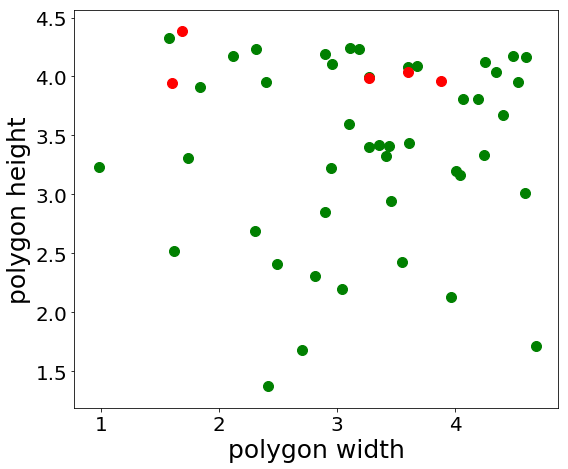

s19: task:[2.3  2.69] rew:43.924971595931424


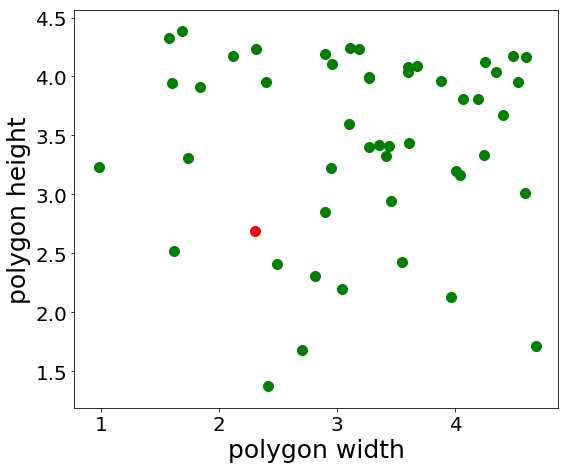

s12: task:[4.69 1.72] rew:-63.72956569588602
s12: task:[1.68 4.38] rew:-96.51590827231112
s12: task:[3.55 2.43] rew:-116.10649541487463
s12: task:[3.68 4.09] rew:-119.72561431150532
s12: task:[2.31 4.23] rew:31.65528545879922
s12: task:[4.54 3.95] rew:-12.89318974363641
s12: task:[4.01 3.19] rew:-120.82411783013761
s12: task:[2.4  3.95] rew:-58.86331948899992
s12: task:[4.41 3.68] rew:-61.50173160019805
s12: task:[4.25 4.12] rew:117.79407407212958
s12: task:[4.35 4.04] rew:-113.063441117991
s12: task:[1.58 4.33] rew:145.52940484474928
s12: task:[4.49 4.18] rew:3.3429437357492304
s12: task:[3.19 4.23] rew:119.58652148363706
s12: task:[3.61 4.08] rew:41.45690812420894
s12: task:[4.6  4.16] rew:-75.51730759273767
s12: task:[1.6  3.94] rew:-73.99578550998689
s12: task:[3.27 3.99] rew:-109.28871676053083
s12: task:[1.84 3.91] rew:206.1158754458322
s12: task:[3.27 3.98] rew:35.42553625234234
s12: task:[3.6  4.04] rew:-70.6202587239186
s12: task:[2.12 4.18] rew:-64.11045536170401


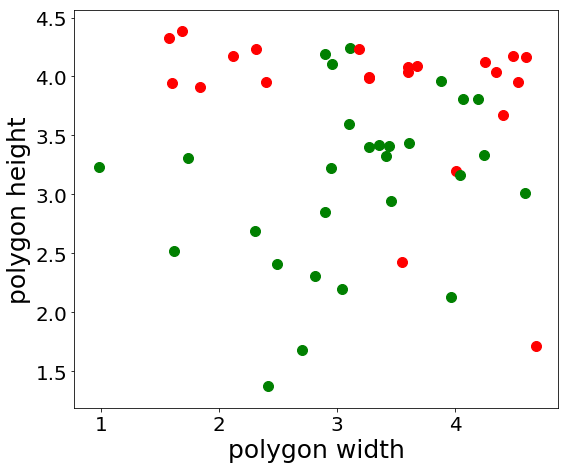

s9: task:[1.6  3.94] rew:-97.87767168279204
s9: task:[3.05 2.19] rew:148.8329059858021
s9: task:[3.27 3.98] rew:71.02050996580886


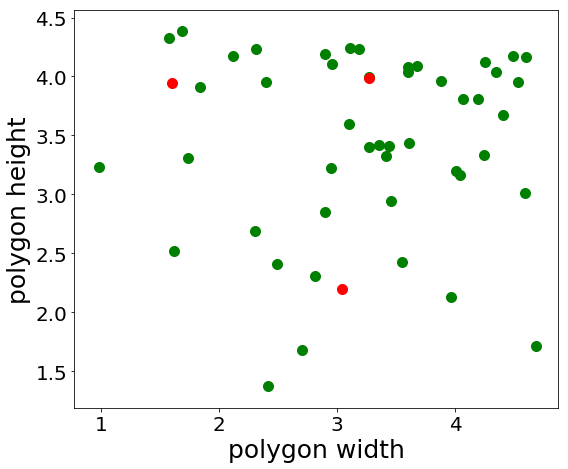

s8: task:[3.97 2.13] rew:124.43807717148539
s8: task:[1.68 4.38] rew:-36.85437148185875
s8: task:[4.35 4.04] rew:-45.63712757960171
s8: task:[3.19 4.23] rew:-26.173092809613152


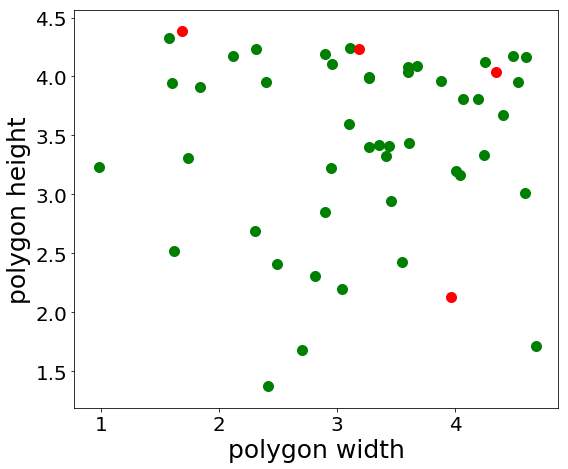

s18: task:[3.88 3.96] rew:-2.0941596683431767
s18: task:[0.98 3.23] rew:-70.79906689571101
s18: task:[1.68 4.38] rew:-68.07535764115558
s18: task:[3.68 4.09] rew:-74.33777272119622
s18: task:[2.31 4.23] rew:-107.43703233045605
s18: task:[4.54 3.95] rew:-76.44094626767833
s18: task:[4.01 3.19] rew:-68.96940205704009
s18: task:[2.4  3.95] rew:-77.22070028767111
s18: task:[3.11 4.24] rew:-79.20098426859936
s18: task:[4.25 4.12] rew:-91.55717944931865
s18: task:[4.35 4.04] rew:-37.13995374052961
s18: task:[1.74 3.31] rew:-102.77176793626597
s18: task:[1.58 4.33] rew:-60.479430282219475
s18: task:[4.07 3.81] rew:-62.95985316932028
s18: task:[4.49 4.18] rew:-67.89461467119841
s18: task:[3.19 4.23] rew:-47.40547027001582
s18: task:[2.96 4.1 ] rew:-73.70998448307857
s18: task:[3.61 4.08] rew:-66.67244460630576
s18: task:[3.61 3.44] rew:-35.377134058508794
s18: task:[3.44 3.41] rew:-111.99302738186427
s18: task:[4.6  4.16] rew:-69.00981522131846
s18: task:[2.9  4.19] rew:-69.81456890511507
s18:

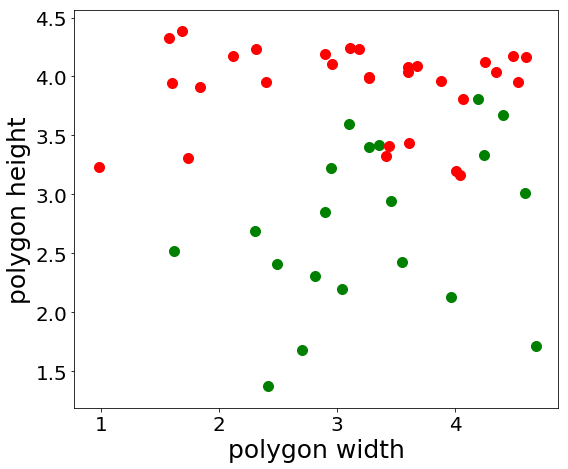

s17: task:[3.88 3.96] rew:-32.73616002114296
s17: task:[2.95 3.23] rew:141.3847821047064
s17: task:[0.98 3.23] rew:122.30086487426411
s17: task:[2.7  1.68] rew:188.1934135529413
s17: task:[1.68 4.38] rew:6.332159647076176
s17: task:[3.68 4.09] rew:-66.1353223071305
s17: task:[2.31 4.23] rew:84.20681175081077
s17: task:[1.62 2.52] rew:59.17740024584016
s17: task:[4.54 3.95] rew:23.911725648961248
s17: task:[3.35 3.42] rew:-4.894083627518705
s17: task:[4.01 3.19] rew:-65.62932038263126
s17: task:[2.4  3.95] rew:-50.69867512341041
s17: task:[4.25 3.33] rew:63.00137427250387
s17: task:[3.27 3.41] rew:-32.107833487881095
s17: task:[4.41 3.68] rew:-47.09304024803961
s17: task:[3.11 4.24] rew:2.1203231651921044
s17: task:[4.25 4.12] rew:-67.18309062293942
s17: task:[4.35 4.04] rew:-66.450960687691
s17: task:[1.74 3.31] rew:47.61594449636293
s17: task:[2.49 2.41] rew:14.808766198536176
s17: task:[2.3  2.69] rew:47.70676940768581
s17: task:[4.49 4.18] rew:-72.65652739509255
s17: task:[3.19 4.23

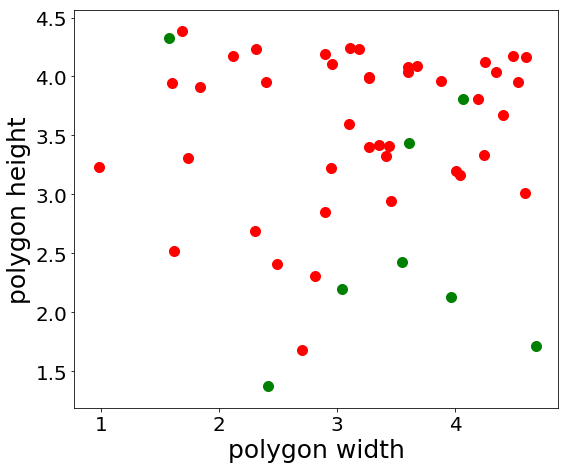

s16: task:[1.68 4.38] rew:25.748499868414672
s16: task:[3.05 2.19] rew:110.86637138716458
s16: task:[3.27 3.98] rew:108.28628758800647


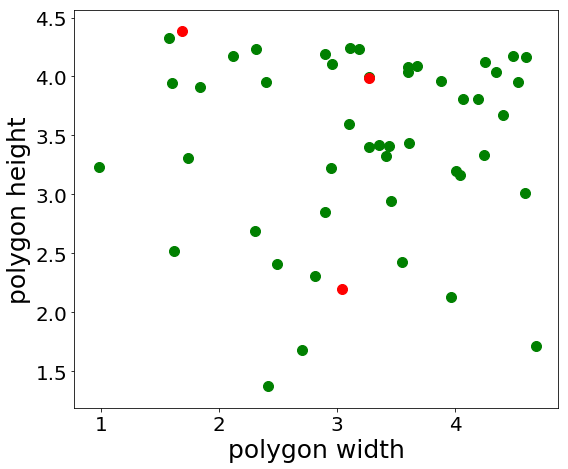

s11: task:[3.88 3.96] rew:-83.9135634756658
s11: task:[4.69 1.72] rew:-74.04178728169364
s11: task:[3.97 2.13] rew:13.584140064892658
s11: task:[2.95 3.23] rew:-77.4890953766755
s11: task:[0.98 3.23] rew:-60.44619641512297
s11: task:[2.7  1.68] rew:68.93692618449217
s11: task:[1.68 4.38] rew:-90.80806574600759
s11: task:[3.55 2.43] rew:-98.14627602464564
s11: task:[3.68 4.09] rew:-82.25690541231069
s11: task:[2.31 4.23] rew:-75.28935919446197
s11: task:[1.62 2.52] rew:-89.83318663645862
s11: task:[4.54 3.95] rew:-79.50327963690987
s11: task:[3.35 3.42] rew:-81.15152649794547
s11: task:[4.01 3.19] rew:-76.59990992644423
s11: task:[2.4  3.95] rew:-74.6867160006072
s11: task:[4.25 3.33] rew:-67.09616907816981
s11: task:[3.27 3.41] rew:-61.201522265146174
s11: task:[4.41 3.68] rew:-114.38883738723759
s11: task:[3.11 4.24] rew:-82.58519977921992
s11: task:[4.25 4.12] rew:-74.4330529527179
s11: task:[4.35 4.04] rew:-83.1440953032252
s11: task:[1.74 3.31] rew:-74.77485714552672
s11: task:[1.5

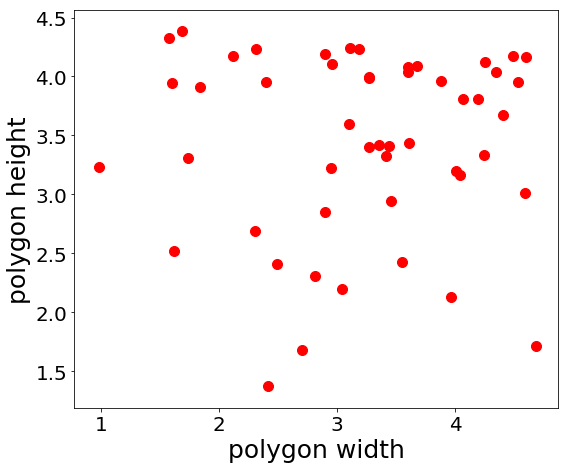

s10: task:[3.88 3.96] rew:52.31644796580929
s10: task:[1.68 4.38] rew:-33.44994193102592
s10: task:[3.68 4.09] rew:-157.57241589637434
s10: task:[2.31 4.23] rew:49.55298109806486
s10: task:[3.27 3.41] rew:-77.50210555293098
s10: task:[4.25 4.12] rew:-80.8700744752033
s10: task:[4.35 4.04] rew:-86.48754278128744
s10: task:[1.74 3.31] rew:120.9764443909518
s10: task:[4.49 4.18] rew:36.06951231693441
s10: task:[3.61 4.08] rew:-78.26979772006752
s10: task:[4.6  4.16] rew:157.73362738434304
s10: task:[3.27 3.99] rew:-147.05223659097763
s10: task:[3.27 3.98] rew:-46.48039277997577
s10: task:[3.6  4.04] rew:-13.405819422385463
s10: task:[2.12 4.18] rew:54.838044738685966


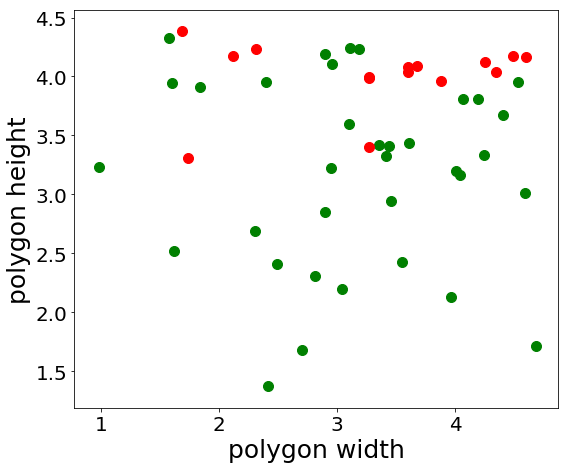

s14: task:[3.88 3.96] rew:-98.54534816738538
s14: task:[2.95 3.23] rew:14.435417411269265
s14: task:[0.98 3.23] rew:-77.326204447262
s14: task:[1.68 4.38] rew:-100.21945677399836
s14: task:[3.68 4.09] rew:-100.23550996376666
s14: task:[2.31 4.23] rew:-95.1119141790318
s14: task:[4.54 3.95] rew:-73.15774956324486
s14: task:[3.35 3.42] rew:-10.902249649275234
s14: task:[4.01 3.19] rew:-70.7630317505718
s14: task:[2.4  3.95] rew:-91.94390959825093
s14: task:[4.25 3.33] rew:-78.54843196412392
s14: task:[3.27 3.41] rew:-98.45393006649482
s14: task:[4.41 3.68] rew:-97.38800132499361
s14: task:[3.11 4.24] rew:-76.20711815690703
s14: task:[4.25 4.12] rew:-94.97123230814589
s14: task:[4.35 4.04] rew:-101.87519263865572
s14: task:[1.74 3.31] rew:-89.55037583314066
s14: task:[1.58 4.33] rew:-97.69005290801383
s14: task:[4.07 3.81] rew:-21.844730924184503
s14: task:[2.3  2.69] rew:-91.84029466673759
s14: task:[4.49 4.18] rew:-103.43986317394773
s14: task:[3.19 4.23] rew:-76.945943935283
s14: task:

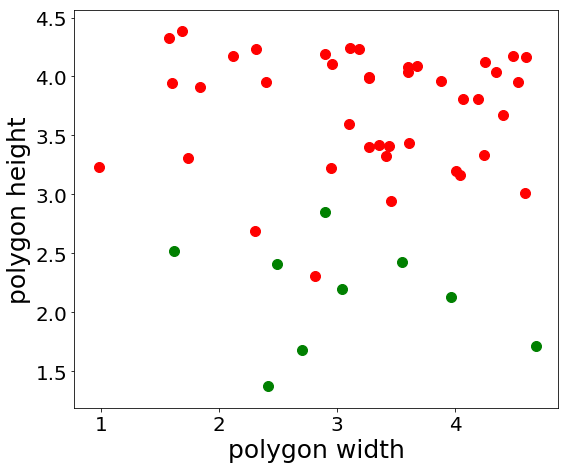

s13: task:[3.88 3.96] rew:-83.84944377390539
s13: task:[4.69 1.72] rew:-91.1401847826004
s13: task:[3.97 2.13] rew:-100.11138282697027
s13: task:[2.95 3.23] rew:-88.00720666686895
s13: task:[0.98 3.23] rew:-90.94083519494643
s13: task:[2.7  1.68] rew:-79.78438165630823
s13: task:[1.68 4.38] rew:-92.25067555790783
s13: task:[3.55 2.43] rew:-86.73260585367062
s13: task:[3.68 4.09] rew:-93.86826742123274
s13: task:[2.31 4.23] rew:-86.76227153607245
s13: task:[1.62 2.52] rew:-85.88195276902186
s13: task:[4.54 3.95] rew:-89.41372567608519
s13: task:[3.35 3.42] rew:-83.43255287837943
s13: task:[4.01 3.19] rew:-91.2857576344712
s13: task:[2.4  3.95] rew:-78.87227540697985
s13: task:[4.25 3.33] rew:-87.05841497397178
s13: task:[3.27 3.41] rew:-130.80480426882397
s13: task:[4.41 3.68] rew:-99.15039117379088
s13: task:[3.11 4.24] rew:-92.82165839745409
s13: task:[4.25 4.12] rew:-82.53385992959073
s13: task:[4.35 4.04] rew:-95.56737362590948
s13: task:[1.74 3.31] rew:-78.004123476117
s13: task:[1

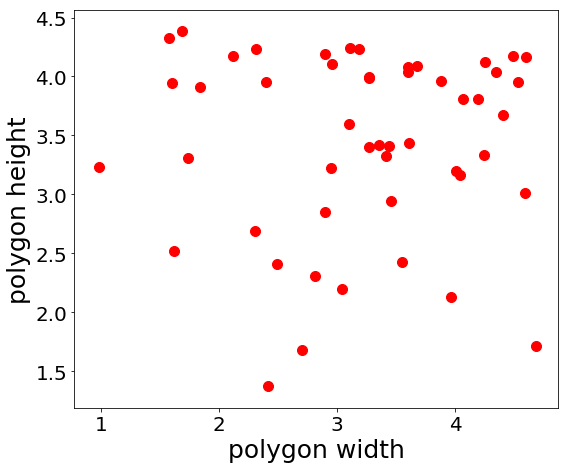

In [21]:
# FOR COMPLEX POLY ENV
def extract_env_params(env_goals, order=['poly_ss']):
    #order = ['stump_hs', 'tunnel_hs']
    if order == ['poly_ss']:
        flat_env_params = copy.copy(env_goals[order[0]])
        # map to 2d height and width
        scaling = 14/30.0
        obstacle_polygon = [(-0.5,0),(-0.5,0.25),(-0.25,0.5),(0.25,0.5),(0.5,0.25),(0.5,0)]
        height_width_params = []
        for params in flat_env_params:
            paired_params = [[params[i],params[i+1]] for i in range(0,len(params),2)]
            #print(paired_params)
            # first recover polygon coordinate
            poly_coord = []
            for i,(b,d) in enumerate(zip(obstacle_polygon, paired_params)):
                #print(paired_params)
                if i != 0 and i != (len(obstacle_polygon)-1):
                    poly_coord.append([(b[0]*scaling) + (d[0]*scaling),
                                      (b[1]*scaling) + (d[1]*scaling)])
                else:
                    poly_coord.append([(b[0] * scaling) + (d[0]*scaling),
                                       (b[1] * scaling)])
            # the find maximal width and height
            poly_coord = np.array(poly_coord)
            min_x = np.min(poly_coord[:,0])
            max_x = np.max(poly_coord[:,0])
            min_y = np.min(poly_coord[:,1])
            max_y = np.max(poly_coord[:,1])
            height_width_params.append([(max_x - min_x)/scaling, (max_y - min_y)/scaling])
        return height_width_params

scaling = 14/30.0
obstacle_polygon = [(-0.5,0),(-0.5,0.25),(-0.25,0.5),(0.25,0.5),(0.5,0.25),(0.5,0)]
# FIXED SET PERFS VIZU
size_test_set = 50
mastered_thr = 230
max_epochs = 100
stats = {}
for i,(m_id,label) in enumerate(labels.items()):
    if "gmmplong" not in m_id:
        continue
    print(m_id)
    runs_data = models_saves[m_id]['data']
#         stats[m_id] = {'mean_nb_mastered':np.zeros((len(runs_data),max_epochs)),
#                       'mean_r_per_t':np.zeros((len(runs_data),size_test_set))}
    #collect raw perfs
    for r,run in enumerate(runs_data):
#         if r is not 0:
#             continue
        models_saves[m_id]['data'][r]['nb_mastered'] = []
        for j in range(len(run['evaluation return'])):#max_epoch):
            test_data = np.array(run['env_test_rewards'][j*size_test_set:(j+1)*(size_test_set)])
            nb_mastered = len(np.where(test_data > mastered_thr)[0])
            models_saves[m_id]['data'][r]['nb_mastered'].append((nb_mastered/50)*100)

        tasks =  extract_env_params(run['env_params_test'])
        plt.figure(figsize=(8,8))
        ax = plt.gca()
#         ax.set_xlim(left=0,right=5)
#         ax.set_ylim(top=5, bottom=0)
        ax.tick_params(axis='both', which='major', labelsize=20)
        
        #print("{} t:{} r={}".format(m_id,np.round(t,2),m))
        for k,(rew,t) in enumerate(zip(run['env_test_rewards'][-size_test_set:], tasks[-size_test_set:])):
            if rew >= 230:
                ax.scatter(t[0], t[1], c="green", s=100, zorder=2)

            else:
                #pass
                print('s{}: task:{} rew:{}'.format(runs_data[r]['config']['seed'], np.round(t,2), rew))
                ax.scatter(t[0], t[1], c="red", s=100, zorder=2)
        ax.set_xlabel('polygon width', fontsize=25)
        ax.set_ylabel('polygon height', fontsize=25)
        ax.set_aspect('equal', 'box')
        plt.tight_layout()
        #plt.savefig("graphics/gmmcomplex_triptic_{}_{}.png".format(m_id,runs_data[r]['config']['seed']))
        plt.show()
#         mean_r_per_t = np.median(stats[m_id]['mean_r_per_t'],axis=0)
#         last_t = extract_env_params(run['env_params_test'],order=['stump_hs', 'ob_sps'])[-size_test_set:]
#         last_t = np.round(last_t,2)
        
        
#         plt.figure(figsize=(4,8))
#         ax = plt.gca()
#         ax.set_xlim(left=0,right=3)
#         ax.set_ylim(top=6, bottom=0)
#         ax.locator_params(axis='x', nbins=5)
#         ax.locator_params(axis='y', nbins=5)
#         ax.tick_params(axis='both', which='major', labelsize=20)
#         for m,t in zip(mean_r_per_t, last_t):
#             if m > 230:
#                 ax.scatter(t[0], t[1], c="green", s=100, zorder=2)
#             else:
#                 ax.scatter(t[0], t[1], c="red", s=100, zorder=2)
#                 #print("{} t:{} r={}".format(m_id,np.round(t,2),m))
#         plt.savefig("graphics/mastered_env_{}.png".format(m_id))
#         plt.show()
    
                           
#             print(run['env_params_test']['stump_hs'][0])
#             print(len(run['env_test_rewards']))
#             print(run['Epoch'][-1]*size_test_set)
#             print(list(run))
        #print(np.mean(stats[m_id]['mean_nb_mastered'], axis=0))

In [ ]:
#FOR SIMPLE ENV
def extract_env_params(env_goals, order=['stump_hs','stump_ws','stump_rs','ob_sps']):
    #order = ['stump_hs', 'tunnel_hs']
    if len(order) == 1:
        pass #work already done
    if order == ['stump_hs', 'ob_sps']:
        for ep_nb in range(nb_episodes):
                flat_env_params[ep_nb].append(env_goals['ob_sps'][ep_nb]) #ignore variance
    elif order == ['stump_hs','stump_ws','stump_rs','ob_sps']:
        for ep_nb in range(nb_episodes):
            flat_env_params[ep_nb].append(env_goals['stump_ws'][ep_nb][0]) #ignore variance 
            flat_env_params[ep_nb].append(env_goals['stump_rs'][ep_nb][0]) #ignore variance 
            flat_env_params[ep_nb].append(env_goals['ob_sps'][ep_nb]) #ignore variance
    else:
        for ep_nb in range(nb_episodes):
            for i in range(1,len(order)):
                flat_env_params[ep_nb].append(env_goals[order[i]][ep_nb]) #ignore variance 
    return flat_env_params

scaling = 14/30.0
obstacle_polygon = [(-0.5,0),(-0.5,0.25),(-0.25,0.5),(0.25,0.5),(0.5,0.25),(0.5,0)]
use_poly = True
# FIXED SET PERFS VIZU
size_test_set = 50
mastered_thr = 230
max_epochs = 100
stats = {}
test_set_inds = [0,3,8,9,11,13,14,16,18,19,22,27,28,33,34,38,40,46,49]
for i,(m_id,label) in enumerate(labels.items()):
#     if "long" not in m_id:
#         continue
    print(m_id)
    runs_data = models_saves[m_id]['data']
#         stats[m_id] = {'mean_nb_mastered':np.zeros((len(runs_data),max_epochs)),
#                       'mean_r_per_t':np.zeros((len(runs_data),size_test_set))}
    #collect raw perfs
    for r,run in enumerate(runs_data):
        models_saves[m_id]['data'][r]['nb_mastered'] = []
        models_saves[m_id]['data'][r]['avg_pos_rewards'] = []
        models_saves[m_id]['data'][r]['local_rewards'] = []
        for j in range(len(run['evaluation return'])):#max_epoch):
            test_data = np.array(run['env_test_rewards'][j*size_test_set:(j+1)*(size_test_set)])
            #tasks =  extract_env_params(run['env_params_test'],order=['poly_ss'])#order=['stump_hs', 'ob_sps'])#,order=['stump_hs', 'ob_sps'])#order=['poly_ss'])#
#                 local_rewards = []
#                 for t,rew in zip(tasks[j*size_test_set:(j+1)*(size_test_set)], test_data):
#                     if "short" in m_id:
#                         if t[0] < 1.10:
#                             local_rewards.append(rew)
#                     elif "short" in m_id:
#                         if t[0] < 1.75:
#                             local_rewards.append(rew)
#                     else:#long case
#                         local_rewards.append(rew)

            nb_mastered = len(np.where(test_data > mastered_thr)[0])

            models_saves[m_id]['data'][r]['nb_mastered'].append((nb_mastered/50)*100)
            #models_saves[m_id]['data'][r]['avg_pos_rewards'].append(np.mean(local_rewards))
            #models_saves[m_id]['data'][r]['local_rewards'].append(np.mean(pos_rewards))
#                 stats[m_id]['mean_nb_mastered'][r][j] = nb_mastered
#             for h,reward in enumerate(run['env_test_rewards'][-size_test_set:]):
#                 stats[m_id]['mean_r_per_t'][r][h] = reward



#         plt.figure(figsize=(4,8))
#         ax = plt.gca()
#         ax.set_xlim(left=0,right=3)
#         ax.set_ylim(top=6, bottom=0)
#         ax.tick_params(axis='both', which='major', labelsize=20)
        
#         #print("{} t:{} r={}".format(m_id,np.round(t,2),m))
#         print('wtf')
#         for k,(rew,t) in enumerate(zip(run['env_test_rewards'][-size_test_set:], tasks[-size_test_set:])):
#             if rew >= 230:
#                 ax.scatter(t[0], t[1], c="green", s=100, zorder=2)

#             else:
#                 #pass
#                 print('s{}: task:{} rew:{}'.format(runs_data[r]['config']['seed'], np.round(t,2), rew))
#                 ax.scatter(t[0], t[1], c="red", s=100, zorder=2)      
#         ax.set_aspect('equal', 'box')
#         plt.tight_layout()
#         plt.savefig("graphics/gmmcomplex_{}_{}.png".format(m_id,runs_data[r]['config']['seed']))
#         plt.show()
#         mean_r_per_t = np.median(stats[m_id]['mean_r_per_t'],axis=0)
#         last_t = extract_env_params(run['env_params_test'],order=['stump_hs', 'ob_sps'])[-size_test_set:]
#         last_t = np.round(last_t,2)
        
        
#         plt.figure(figsize=(4,8))
#         ax = plt.gca()
#         ax.set_xlim(left=0,right=3)
#         ax.set_ylim(top=6, bottom=0)
#         ax.locator_params(axis='x', nbins=5)
#         ax.locator_params(axis='y', nbins=5)
#         ax.tick_params(axis='both', which='major', labelsize=20)
#         for m,t in zip(mean_r_per_t, last_t):
#             if m > 230:
#                 ax.scatter(t[0], t[1], c="green", s=100, zorder=2)
#             else:
#                 ax.scatter(t[0], t[1], c="red", s=100, zorder=2)
#                 #print("{} t:{} r={}".format(m_id,np.round(t,2),m))
#         plt.savefig("graphics/mastered_env_{}.png".format(m_id))
#         plt.show()
    
                           
#             print(run['env_params_test']['stump_hs'][0])
#             print(len(run['env_test_rewards']))
#             print(run['Epoch'][-1]*size_test_set)
#             print(list(run))
        #print(np.mean(stats[m_id]['mean_nb_mastered'], axis=0))

In [17]:
def plot_with_std(subplot_nb, ax,x,y,err,color,shade_color,label,
                  y_min=None,y_max=None, legend=False, title=None, ylim=[0,100]):
    #plt.rcParams.update({'font.size': 15})
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.plot(x,y, color=color, label=label,linewidth=7)
    print("{}:{}".format(y[-1],err[-1]))
    ax.fill_between(x,y-err,y+err,color=shade_color,alpha=0.2)
    if legend:
        leg = ax.legend(loc='auto', fontsize=34)
        for legobj in leg.legendHandles:
            legobj.set_linewidth(8.0)
    ax.set_xlabel('Million steps', fontsize=30)
    if subplot_nb == 0:
        ax.set_ylabel('% Mastered env', fontsize=30)
    ax.set_xlim(xmin=min(x),xmax=40)
    ax.set_ylim(bottom=ylim[0],top=ylim[1])
    if title:
        ax.set_title(title, fontsize=22)

def plot_all_and_median(subplot_nb, ax,x,ys,color,label,
                         y_min=None,y_max=None, legend=False, title=None):
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    ax.tick_params(axis='both', which='major', labelsize=30)
    #print(ys)
            
    median = np.median(np.array(ys), axis=0)
    #print(median)
    for k,y in enumerate(ys):
        print("max:{} last:{}".format(max(y), y[-1]))
        ax.plot(x[0:min_len],y, color=color, linewidth=1.5, alpha=0.3)
    ax.plot(x[0:min_len],median, color=color, linewidth=7 , label=label)
    if legend:
        leg = ax.legend(loc='bottom right', fontsize=25)
    ax.set_xlabel('Million steps', fontsize=18)
    if subplot_nb == 0:
        ax.set_ylabel('% Mastered env', fontsize=18)
    ax.set_xlim(xmin=0,xmax=40)
    if y_min is not None:
        ax.set_ylim(bottom=y_min,top=y_max)
    else:
        ax.set_ylim(top=100)
    if title:
        ax.set_title(title, fontsize=22)

def get_welch(algo_0='amb', algo_1='rmb', epoch=0, metric='nb_mastered'):
    print("algo0:{}, algo1:{}".format(algo_0,algo_1))
    #print(j)
    final_explos = dict()
    for i,(m_id,d) in enumerate(models_saves.items()):
        if algo_0 in m_id or algo_1 in m_id:
            final_explos[m_id] = []
            #print(m_id)
            runs_data = d['data']
            ys = []
            if epoch != 0:
                long_enough = True
                for run in runs_data:
                    #print(len(run[metric]))
                    if len(run[metric]) < epoch:
                        long_enough = False
                if not long_enough:
                    print("aborting: {} not long enough".format(m_id))
                    return
            for run in runs_data:
                final_explos[m_id].append(run[metric][epoch-1])
                #print("ahh")
                    

    print('welch {}'.format(ss.ttest_ind(final_explos[algo_0], final_explos[algo_1], equal_var=False)))
        

In [ ]:
#PER AGENT PERFS SIMPLE EXPE
#order = ['oracle','gmm','riac','rand']
agent_types = ["short","default", "long"]
legend = [False, False, True]
y_max = [35,65,100]
plt.ion()
for k, a_type in enumerate(agent_types):
    f, ax = plt.subplots(1,1,figsize=(10,7))
    ax = [ax]
    for i,(m_id,label) in enumerate(labels.items()):
        if a_type in m_id:
            print(m_id)
            runs_data = models_saves[m_id]['data']
            ys = []
            for run in runs_data:  
                #print(run['config']['seed'])
                data = run['nb_mastered']
                #data = run['avg_pos_rewards']
                #data = run['local_rewards']
                #data = run['evaluation return']
                episodes = np.array(run['total timesteps'])
                ys.append(data)
            #clean data    
            min_len = 999999
            for y in ys:
                if len(y) < min_len:
                    
                    min_len = len(y)
            ys_same_len = []
            for y in ys:
                ys_same_len.append(y[0:min_len])
            episodes = episodes[0:min_len]
            episodes = [e/1000000 for e in episodes]
            #print(episodes)

#             plot_all_and_median(0, ax[0], episodes,ys_same_len,colors[m_id],label,
#                                 title="Median BW stump width/height/rotation/spacing {} agent".format(a_type), legend=True)
            plot_with_std(0, ax[0],episodes,np.mean(ys_same_len,axis=0),np.std(ys_same_len,axis=0),colors[m_id],colors[m_id],label,
                    legend=legend[k],ylim=[0,y_max[k]])
            plt.tight_layout()
            f.savefig('graphics/all_perfs_{}_agents_mastered_envs.png'.format(a_type))

# perform welch tests:
for type0 in agent_types:
    for i0,(m_id0,label0) in enumerate(labels.items()):
        if type0 in m_id0 and 'gmm' in m_id0:
            for i1,(m_id1,label1) in enumerate(labels.items()):
                if type0 in m_id1:
                    get_welch(algo_0=m_id0, algo_1=m_id1)
                        
# get_welch(algo_0='gmmcontdefault08-06', algo_1="randcontdefault08-06")
# get_welch(algo_0='gmmcontshort07-06', algo_1="randcontshort07-06")
# get_welch(algo_0='gmmcontlong09-06', algo_1="randcontlong09-06")
# get_welch(algo_0='gmmcontdefault08-06', algo_1="riaccontdefault08-06")
# get_welch(algo_0='gmmpolylong17-06', algo_1='randpolylong17-06')
# get_welch(algo_0='gmmpolydefault17-06', algo_1='randpolydefault17-06')
# get_welch(algo_0=, algo_1='gmmpolylong17-06')
# get_welch(algo_0='gmmpolydefault17-06', algo_1='randpolydefault17-06')
        
#plt.savefig("graphics/sac_sagg_vs_random_3_leg_sizes.png", bbox_inches='tight')

gmmplongcpu22-06
max:86.0 last:70.0
max:100.0 last:94.0
max:96.0 last:64.0
max:100.0 last:82.0
max:90.0 last:44.0
max:50.0 last:22.0
max:52.0 last:34.0
max:100.0 last:100.0
max:8.0 last:0.0
max:92.0 last:90.0
max:38.0 last:20.0
max:4.0 last:0.0
riacplongcpu22-06
max:98.0 last:88.0
max:2.0 last:0.0
max:30.0 last:4.0
max:2.0 last:0.0
max:12.0 last:2.0
max:12.0 last:4.0
max:28.000000000000004 last:0.0
max:98.0 last:98.0
max:54.0 last:22.0
max:100.0 last:84.0
max:6.0 last:0.0
max:94.0 last:82.0
max:100.0 last:94.0
max:16.0 last:4.0
max:16.0 last:0.0
randplongcpu23-06
max:100.0 last:96.0
max:0.0 last:0.0
max:0.0 last:0.0
max:6.0 last:0.0
max:6.0 last:0.0
max:12.0 last:0.0
max:0.0 last:0.0
max:10.0 last:2.0
max:12.0 last:0.0
max:10.0 last:0.0
max:0.0 last:0.0
max:98.0 last:90.0
max:8.0 last:0.0
max:2.0 last:0.0
max:4.0 last:4.0
max:8.0 last:0.0
max:4.0 last:0.0
max:0.0 last:0.0
max:38.0 last:0.0
max:24.0 last:6.0
algo0:gmmp10longcpu25-06, algo1:riacp10longcpu25-06
aborting: riacp10longcpu25-

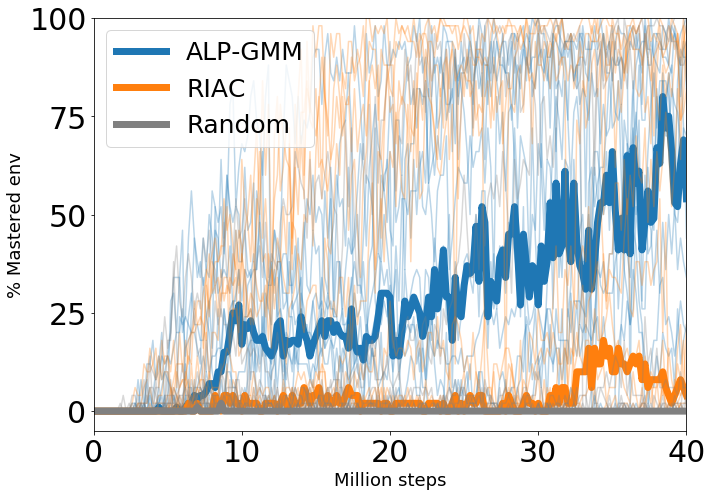

In [19]:
#Increasing stump height experience
#agent_types = ["rand","gmm","riac"]
agent_types = ['pl']
plt.ion()
for a_type in agent_types:
    f, ax = plt.subplots(1,1,figsize=(10,7))
    ax = [ax]
    for i,(m_id,label) in enumerate(labels.items()):
        if a_type in m_id and 'bmm' not in m_id and 'oracle' not in m_id:
            print(m_id)
            runs_data = models_saves[m_id]['data']
            ys = []
            for run in runs_data:  
                #print(run['config']['seed'])
                data = run['nb_mastered']
                #data = run['evaluation return']
                episodes = np.array(run['total timesteps'])
                ys.append(data)
            #clean data    
            min_len = 200
            for y in ys:
                if len(y) < min_len:
                    
                    min_len = len(y)
            ys_same_len = []
            for y in ys:
                ys_same_len.append(y[0:min_len])
            episodes = episodes[0:min_len]
            episodes = [e/1000000 for e in episodes]
            #print(episodes)

            plot_all_and_median(0, ax[0], episodes,ys_same_len,colors[m_id],label,
                                 legend=True)
#             plot_with_std(0, ax[0],episodes,np.mean(ys_same_len,axis=0),
#                           np.std(ys_same_len,axis=0),colors[m_id],colors[m_id],label,legend=True,ylim=[0,100])
            plt.tight_layout()
            #f.savefig('graphics/stump_height_{}_agents_mastered_envs.png'.format(a_type))
            #f.savefig('graphics/complex_{}_agents_mastered_envs.png'.format(a_type))

# perform welch tests:
for type0 in ['p10']:
    for i0,(m_id0,label0) in enumerate(labels.items()):
        if type0 in m_id0 and 'gmm' in m_id0:
            for i1,(m_id1,label1) in enumerate(labels.items()):
                if type0 in m_id1 and 'riac' in m_id1:
                    get_welch(algo_0=m_id0, algo_1=m_id1, epoch=220)

In [ ]:
#single plot
plt.ion()
f, ax = plt.subplots(1,1,figsize=(10,7))
ax = [ax]
fm, axm = plt.subplots(1,1,figsize=(10,7))
axm = [axm]
for i,(m_id,label) in enumerate(labels.items()):
    #print(m_id)
    runs_data = models_saves[m_id]['data']
    #print(len(runs_data))
    ys = []
    for run in runs_data:  
        #print(list(run))
        data = run['nb_mastered']
        #data = run['AverageEpRet']
        #print(list(run))
        episodes = np.array(run['total timesteps'])
        #print(run['config']['seed'])
        #print(len(run['env_params_train']))
        #print(len(run['env_params_test']))
        ys.append(data)
        #clean data    
    min_len = 999999
    for y in ys:
        if len(y) < min_len:
            min_len = len(y)
    ys_same_len = []
    for y in ys:
        ys_same_len.append(y[0:min_len])
    episodes = episodes[0:min_len]
    episodes = [e/1000000 for e in episodes]
    
#     plot_all_and_median(0, ax[0], episodes,ys_same_len,colors[m_id],label,
#                         title="BW (stumps[0,3],spacing[0,6]) all levels", legend=True)
    #f.savefig('graphics/sac_sagg_vs_random_3_leg_sizes.png')
    plot_with_std(0, axm[0],episodes,np.mean(ys_same_len,axis=0),np.std(ys_same_len,axis=0),colors[m_id],colors[m_id],label,
                   legend=False,ylim=[0,55])

#get_welch(algo_0='saggcont02-05', algo_1="randcont02-05")
        
#plt.savefig("graphics/sac_sagg_vs_random_3_leg_sizes.png", bbox_inches='tight')

In [ ]:
# LEVELS PERFS
nb_levels = 3
nb_tests_per_epochs = 15
level_step = int(nb_tests_per_epochs / nb_levels)
def get_level_ys(runs_data, min_len):
    level_ys = {}
    for i in range(nb_levels):
        level_ys[str(i)] = []
    nb_tests = len(runs_data[0]['env_test_rewards'][0:min_len*nb_tests_per_epochs])
    nb_steps = nb_tests/nb_tests_per_epochs
    steps = np.arange(0,nb_tests,nb_tests_per_epochs)
    #collect raw perfs
    for run in runs_data:
        print(len(run['env_test_rewards']))
        raw_y = run['env_test_rewards'][0:min_len*nb_tests_per_epochs]
        level_y = {}
        for i in range(nb_levels):
            level_y[str(i)] = []
        for j in steps:
            #print(j)
            test_batch = raw_y[j:j+nb_tests_per_epochs]
            #print(test_batch)
            last_idx = 0
            for i in range(nb_levels):
                level_y[str(i)].append(np.mean(test_batch[last_idx:last_idx+level_step]))
                last_idx = last_idx+level_step
        for k in level_ys.keys():
            level_ys[k].append(level_y[k])
                
    return level_ys
    
    
f0, ax0 = plt.subplots(1,1,figsize=(10,7))
f1, ax1 = plt.subplots(1,1,figsize=(10,7))
f2, ax2 = plt.subplots(1,1,figsize=(10,7))
ax = [ax0,ax1,ax2]
fm, axm = plt.subplots(1,1,figsize=(10,7))
axm = [axm]
for i,(m_id,label) in enumerate(labels.items()):
    runs_data = models_saves[m_id]['data']
    ys = []
    for run in runs_data:  
        data = run['evaluation return']
        episodes = np.array(run['total timesteps'])
        ys.append(data) 
    #clean data   
    min_len = 999999
    for y in ys:
        if len(y) < min_len:
            min_len = len(y)
    ys_same_len = []
    for y in ys:
        ys_same_len.append(y[0:min_len])
    episodes = episodes[0:min_len]
    level_ys = get_level_ys(runs_data, min_len)
    for k,lvl_ys in level_ys.items():
            plot_all_and_median(0, ax[int(k)], episodes,lvl_ys,colors[m_id],label=label,
                                title="BW (stumps[0,3],spacing[0,6]) level "+k, legend=True)
f0.savefig('graphics/SAC_BW_stumps[0,2]_level0.png')
f1.savefig('graphics/SAC_BW_stumps[0,2]_level1.png')
f2.savefig('graphics/SAC_BW_stumps[0,2]_level2.png')
    
#             plot_with_std(0, ax[int(k)],episodes,np.mean(lvl_ys,axis=0),np.std(lvl_ys,axis=0),colors[m_id],colors[m_id],label,
#                            legend=True, title="SAC on Bipedal Walker (not Hardcore, only grass)")


In [ ]:
from param_env_utils.active_goal_sampling import SAGG_IAC
import matplotlib.patches as patches
from param_env_utils.imgep_utils.gep_utils import scale_vector
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.colorbar as cbar

def scatter_plot_gif(data,nb_steps=50, name='test', xlim=None, ylim=None, fs=(7,7)):
    plt.ioff()
    length = len(data)
    step_size = int(length / nb_steps)
    print("Making an exploration GIF of {} steps".format(nb_steps))
    filenames = []
    for i,max_episodes in enumerate(np.arange(step_size,length+step_size,step_size)):
        scatter_plot(data[0:max_episodes],
                     emph_data=data[max_episodes-step_size:max_episodes],
                     xlim=xlim, ylim=ylim, fs=fs)
        f_name = "graphics/gifs/scatter_{}.png".format(i)
        plt.xlim(xmin=xlim[0],xmax=xlim[1])
        plt.ylim(ymin=ylim[0],ymax=ylim[1])
        plt.savefig(f_name, bbox_inches='tight')
        plt.close(f)
        filenames.append(f_name)
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('graphics/scatter_gif_{}.gif'.format(name), images, duration=0.3)


        
def scatter_plot(data, ax=None, emph_data=None, xlim=[0,2], ylim=[0,2],fs=(7,7)):
    #print(ylim)
    if ax is None:
        f, ax = plt.subplots(1,1,figsize=fs)
    Xs,Ys = [d[0] for d in data], [d[1] for d in data]
    if emph_data is not None:
        emphXs,emphYs = [d[0] for d in emph_data], [d[1] for d in emph_data]
    ax.plot(Xs,Ys,'r.',markersize=2)
    ax.set_xlim(xmin=xlim[0],xmax=xlim[1])
    ax.set_ylim(ymin=ylim[0],ymax=ylim[1])
    ax.axis('equal')
    if emph_data is not None:
        ax.plot(emphXs,emphYs,'b.',markersize=5)
    ax.set_xlabel('stump height', fontsize=20)
    ax.set_ylabel('spacing', fontsize=20)
        
def plot_regions(boxes, interests, ax=None, xlim=[0,2], ylim=[0,2]):
    # Create figure and axes
    if ax==None:             
        f, ax = plt.gca()
    # Add the patch to the Axes
    for b,ints in zip(boxes,interests):
        #print(b)
        lx,ly = b.low
        hx,hy = b.high
        c = plt.cm.jet(ints)
        rect = patches.Rectangle([lx,ly],(hx - lx),(hy - ly),linewidth=3,edgecolor='white',facecolor=c)
        ax.add_patch(rect)
        #plt.Rectangle([lx,ly],(hx - lx), (hy - ly))

    cax, _ = cbar.make_axes(ax) 
    cb = cbar.ColorbarBase(cax, cmap=plt.cm.jet) 
    cb.set_label('Mean Competence Progress')
    ax.set_xlim(xmin=xlim[0],xmax=xlim[1])
    ax.set_ylim(ymin=ylim[0],ymax=ylim[1])
    ax.axis('equal')
    ax.set_xlabel('stump height', fontsize=20)
    ax.set_ylabel('stump_spacing', fontsize=20)

def region_plot_gif(all_boxes, interests, iterations, goals,
                    gifname='saggriac', rewards=None, ep_len=None,
                    xlim=[0,2], ylim=[0,2], fs=(18,7), plot_step=250):
    plt.ioff()
    print("Making an exploration GIF: "+gifname)
    filenames = []
    images = []
    steps = []
    mean_rewards = []
    for i in range(len(goals)):
        if i>0 and (i%plot_step == 0):
            f, (ax0,ax1) = plt.subplots(1,2,figsize=fs)
            ax = [ax0,ax1]
            scatter_plot(goals[0:i], ax=ax[0], emph_data=goals[i-plot_step:i], xlim=xlim, ylim=ylim)
            idx = 0
            cur_idx = 0
            for j in range(len(all_boxes)):
                if iterations[j] > i:
                    break
                else:
                    cur_idx = j

#             #ADD TRAINING CURVE
#             ax[2].set_ylabel('Train return', fontsize=18)
#             steps.append(sum(ep_len[0:i]))
#             mean_rewards.append(np.mean(rewards[i-plot_step:i]))
#             ax[2].plot(steps,mean_rewards)
            
            plot_regions(all_boxes[cur_idx], interests[cur_idx],ax=ax[1], xlim=xlim, ylim=ylim)
            f_name = "graphics/gifs/scatter_{}.png".format(i)
            plt.suptitle('Episode {}'.format(i), fontsize=20)
            plt.savefig(f_name, bbox_inches='tight')
            plt.close(f)
            filenames.append(f_name)
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('graphics/{}.gif'.format(gifname), images, duration=0.3)

def extract_env_params(env_goals, order):
    #order = ['stump_hs', 'tunnel_hs']
    flat_env_params = copy.copy(env_goals[order[0]])
    nb_episodes = len(flat_env_params)
    if len(order) == 1:
        pass #work already done
    elif order == ['stump_hs', 'ob_sps']:
        for ep_nb in range(nb_episodes):
                flat_env_params[ep_nb][1] = env_goals['ob_sps'][ep_nb] #ignore variance 
    elif len(order) == 2:
        for ep_nb in range(nb_episodes):
            for i in range(1,len(order)):
                flat_env_params[ep_nb][1] = env_goals[order[i]][ep_nb][0] #ignore variance 
        print(env_goals[order[0]][0])
        print(env_goals[order[1]][1])
        print(flat_env_params[0])
    return flat_env_params

In [ ]:
#PLOT scatter plots
for i,(m_id,d) in enumerate(models_saves.items()):
    if 'long' not in m_id:
        continue
    if 'oracle' not in m_id:
        continue
    print(m_id)
    runs_data = d['data']

    for j,run in enumerate(runs_data):
        #print(j)
        d = run['env_params_train']
        print(d['stump_hs'][0])
        print(d['tunnel_hs'][0])
        print(d.keys())
        print(run['config']['seed'])
        order = []
        if d['stump_hs'][0]:
            order.append('stump_hs')
        if d['tunnel_hs'][0]:
            order.append('tunnel_hs')
        if d['ob_sps'][0]:
            order.append('ob_sps')
        print(order)
        
        scatter_plot(extract_env_params(d, order), xlim=[0,3], ylim=[0,6], fs=(4,8))
        plt.show()
            
#         scatter_plot_gif(extract_env_params(d, order),
#                           name='{}{}'.format(m_id, j), xlim=[0,2], ylim=[0,6])


In [ ]:
# Triptic GMM and RIAC plots
import param_env_utils.imgep_utils.plot_utils as plotter
import importlib
importlib.reload(plotter)
save_dir = 'graphics/'
gmm_seed = 0
gmm_iterations = [500, 1500, 15000]
no_y = [True, True, False]
bars = [True,False,False]

riac_iterations = [1000,2250,7000,12000]
riac_bars = [False, False, False, True]
riac_nb = 2

#scatter_plot(env_goals)
for model_name,_ in models_saves.items():
    if not "default" in model_name:
        continue
    print(models_saves[model_name]['data'][0]['config']['env_babbling'])
    #print(models_saves[sagg_model_name]['data'][0]['config']['seed'])
    if models_saves[model_name]['data'][0]['config']['env_babbling'] == 'sagg_riac':
        all_boxes = models_saves[model_name]['data'][riac_nb]['all_boxes']

        #for boxes in all_boxes:
        #    print(boxes)
        split_iterations = models_saves[model_name]['data'][riac_nb]['split_iterations']
        env_train_rewards = models_saves[model_name]['data'][riac_nb]['env_train_rewards']
        all_interests = models_saves[model_name]['data'][riac_nb]['all_interests']
        env_goals = models_saves[model_name]['data'][riac_nb]['env_params_train']
        ep_len = models_saves[model_name]['data'][riac_nb]['env_train_len']
        order = []
        if env_goals['stump_hs'][0]:
            order.append('stump_hs')
        if env_goals['ob_sps'][0]:
            order.append('ob_sps')
        if len(env_goals) >= 2:
            env_goals = extract_env_params(env_goals, order)
            print(len(env_goals))

        if len(all_boxes) == 0:
            print('abort {}'.format(i))
            continue
        print(len(env_goals))
        name='triptic_RIAC_'+ model_name +str(i)
        rewards=env_train_rewards,
        ep_len=ep_len
        xlim=[0,3]
        ylim=[0,6]
        fs=(16,8)
        plot_step = 1000
        interests = all_interests
        iterations = split_iterations
        goals = env_goals

        filenames = []
        images = []
        steps = []
        mean_rewards = []
        plot_step = 250
        cpt=-1
        for i in range(len(goals)):
            if i > 0 and (i % plot_step == 0) and i in riac_iterations:
                cpt+=1
                f, ax = plt.subplots(1, 1, figsize=(5, 8))
                #plotter.scatter_plot(goals[0:i], ax=ax[0], emph_data=goals[i - plot_step:i], xlim=xlim, ylim=ylim)
                idx = 0
                cur_idx = 0
                for j in range(len(all_boxes)):
                    if iterations[j] > i:
                        break
                    else:
                        cur_idx = j
                print(j)
                plotter.plot_regions(all_boxes[cur_idx], interests[cur_idx], ax=ax, xlim=xlim,
                                     ylim=ylim, bar=riac_bars[cpt])

                #f_name = gifdir+tmpdir+"scatter_{}.png".format(i)
                f_path = save_dir + name +"_{}.png".format(i)
                #plt.suptitle('Episode {}'.format(i), fontsize=20)
                plt.savefig(f_path, bbox_inches='tight')
                plt.show()
                    
    elif models_saves[model_name]['data'][0]['config']['env_babbling'] == 'gmmlkjh':
        #plt.ioff()
        bk = models_saves[model_name]['data'][gmm_seed]
        name='triptic_GMM_'+str(gmm_seed)
        xlim=[0,3]
        ylim=[0,6]
        
        old_ep = 0
        gen_size = int(len(bk['goals_lps']) / len(bk['episodes']))
        gs_lps = bk['goals_lps']
        cpt = -1
        for i,(ws, covs, means, ep) in enumerate(zip(bk['weights'], bk['covariances'], bk['means'], bk['episodes'])):
                if ep not in gmm_iterations:
                    continue
                cpt += 1
                fig_size = (4,8)
                if bars[cpt]:
                    fig_size = (5,8)
                    
                plt.figure(figsize=fig_size)
                ax = plt.gca()
                print(no_y[cpt])
                plotter.plot_gmm(ws, means, covs, np.array(gs_lps[ep:ep+gen_size]),
                         ax=ax, xlim=xlim, ylim=ylim, no_y=no_y[cpt],
                         bar=bars[cpt],bar_side='left')  #add gen_size to have gmm + the points that they generated, not they fitted
                f_path = save_dir + name +"_{}.png".format(ep)
                old_ep = ep
                plt.savefig(f_path, bbox_inches='tight')
                plt.show()

        # fig sizes: normal: (4.5,8) + 
        


In [ ]:
import param_env_utils.imgep_utils.plot_utils as plotter
import importlib
importlib.reload(plotter)
# GIF for algorithms

#scatter_plot(env_goals)
for model_name,_ in models_saves.items():
    if not "default" in model_name:
        continue
    print(models_saves[model_name]['data'][0]['config']['env_babbling'])
    #print(models_saves[sagg_model_name]['data'][0]['config']['seed'])
    if models_saves[model_name]['data'][0]['config']['env_babbling'] == 'sagg_riac':
        for i in range(len(models_saves[model_name]['data'])):
            all_boxes = models_saves[model_name]['data'][i]['all_boxes']

            #for boxes in all_boxes:
            #    print(boxes)
            split_iterations = models_saves[model_name]['data'][i]['split_iterations']
            env_train_rewards = models_saves[model_name]['data'][i]['env_train_rewards']
            all_interests = models_saves[model_name]['data'][i]['all_interests']
            env_goals = models_saves[model_name]['data'][i]['env_params_train']
            ep_len = models_saves[model_name]['data'][i]['env_train_len']
            #print(len(all_boxes))
            #print(len(split_iterations))
            #print(list(env_goals))
            #print(env_goals['stump_hs'][0])
            order = []
            if env_goals['stump_hs'][0]:
                order.append('stump_hs')
            if env_goals['tunnel_hs'][0]:
                order.append('tunnel_hs')
            if env_goals['ob_sps'][0]:
                order.append('ob_sps')
            if len(env_goals) >= 2:
                env_goals = extract_env_params(env_goals, order)
                print(len(env_goals))

            if len(all_boxes) == 0:
                print('abort {}'.format(i))
                continue
            print(len(env_goals))
            region_plot_gif(all_boxes, all_interests, split_iterations, env_goals,
                           gifname='SAGG_'+ model_name +str(i), rewards=env_train_rewards,
                            ep_len=ep_len, xlim=[0,2], ylim=[0,6], fs=(12,9),
                           plot_step = 250)
    elif models_saves[model_name]['data'][0]['config']['env_babbling'] == 'gkjhgmm':
        #for i in range(len(models_saves[model_name]['data'])):
        i = 11
        bk = models_saves[model_name]['data'][i]
        # fig sizes: normal: (4.5,8) + 
        plotter.gmm_plot_gif(models_saves[model_name]['data'][i], gifname='GMM_'+ model_name +str(i),
                            xlim=[0,3],ylim=[0,6], fig_size = (4,8), save_imgs=True, title=False, bar=False)


![](graphics/exploration0.gif)
![](graphics/exploration1.gif)


![SegmentLocal](graphics/gmm0.gif "competence")
![SegmentLocal](graphics/onlineSAGGbignet0.gif "competence")
![SegmentLocal](graphics/onlineSAGGbignet1.gif "competence")
![SegmentLocal](graphics/onlineSAGGbignet2.gif "competence")
![SegmentLocal](graphics/onlineSAGGbignet3.gif "competence")
![SegmentLocal](graphics/onlineSAGGbignet4.gif "competence")
![SegmentLocal](graphics/onlineSAGGbignet5.gif "competence")

In [ ]:
lidar = []
self.lidar[i].fraction = 1.0
            self.lidar[i].p1 = pos
            self.lidar[i].p2 = (
                pos[0] + math.sin(1.5*i/10.0)*LIDAR_RANGE,
                pos[1] - math.cos(1.5*i/10.0)*LIDAR_RANGE)

In [ ]:
metrics_mean_explo = [mean_a_explo, mean_p_explo, mean_s_explo, mean_b_explo, mean_c_explo] 
metrics_std_explo = [std_a_explo, std_p_explo, std_s_explo, std_b_explo, std_c_explo]
plot_steps = np.arange(0,nb_episodes+step_size,step_size)
colors = ['red','blue','green','magenta','black','cyan','orange']
shades_colors = ['lightsalmon','skyblue','lightgreen','violet']
title_info = ["agent", "pickaxe", "shovel", "blocks", "cart"]
model_names = titles
metric = ["agent","pickaxe","shovel","blocks","cart"]
maxes=[85,85,85,100,85]

# # Averaged plots
# f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1,5,figsize=(20,4))
# ax = (ax0, ax1, ax2, ax3, ax4)
# print(model_filenames)
# for j, (models_mean_explo, models_std_explo) in enumerate(zip(metrics_mean_explo, metrics_std_explo)):
#     for i,(mean_explo, std_explo) in enumerate(zip(models_mean_explo, models_std_explo)):
#         y = mean_explo
#         err = std_explo
#         title = ''
#         plot_with_std(j, ax[j], plot_steps,y,err,colors[i],shades_colors[i],model_names[i],
#                       y_min=0,y_max=maxes[j], title=title+title_info[j], legend=True)
        
# #plt.savefig("graphics/grid_cell_exploration_mmc.pdf", bbox_inches='tight')
# #plt.savefig("grid_cell_exploration_samebt.png", bbox_inches='tight')
# plt.show()

#PLOT ALL + MEDIAN
all_explo = [all_a_explo, all_p_explo, all_s_explo, all_b_explo, all_c_explo]
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1,5,figsize=(20,4))
ax = (ax0, ax1, ax2, ax3, ax4)
print(model_filenames)
for j, models_all_explo in enumerate(all_explo):
    for i, explo in enumerate(models_all_explo):
        ys = explo
        title = ''
        plot_all_and_median(j, ax[j], plot_steps,ys,colors[i],shades_colors[i],model_names[i],
                      y_min=0,y_max=maxes[j], title=title+title_info[j], legend=True)
plt.savefig("graphics/grid_cell_exploration_mmc.png", bbox_inches='tight')


In [ ]:
def plot_with_std(x,y,err,color,shade_color,label,y_min,y_max):
    plt.plot(x,y, color=color, label=label,linewidth=1.5)
    plt.fill_between(x,y-err,y+err,color=shade_color,alpha=0.5)
    leg = plt.legend(loc='lower right')
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
    plt.xlabel('episodes')
    plt.ylabel('exploration %')
    if y_min is not None:
        plt.ylim(ymin=y_min,ymax=y_max)
    

labels = ['RND','F-RGB','RMB','AMB']
shades_colors = ['lightsalmon','skyblue','lightgreen','violet']
print("agent exploration")
x = np.arange(0,nb_episodes+step_size,step_size)
for i in range(nb_models):
    print(std_a_explo[i,-1])
    y = mean_a_explo[i,:]
    err = std_a_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_agent_pos_expl.pdf", bbox_inches='tight')
plt.show()

print("shovel exploration")
x = np.arange(0,nb_episodes+step_size,step_size)
for i in range(nb_models):
    print(std_s_explo[i,-1])
    y = mean_s_explo[i,:]
    err = std_s_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_agent_pos_expl.pdf", bbox_inches='tight')
plt.show()

print("pickaxe exploration")
x = np.arange(0,nb_episodes+step_size,step_size)
for i in range(nb_models):
    print(std_p_explo[i,-1])
    y = mean_p_explo[i,:]
    err = std_p_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_agent_pos_expl.pdf", bbox_inches='tight')
plt.show()

print("cart")
for i in range(nb_models):
    print(std_c_explo[i,-1])
    y = mean_c_explo[i,:]
    err = std_c_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_cart_pos_expl.pdf", bbox_inches='tight')
plt.show()

print("blocks")
for i in range(nb_models):
    y = mean_b_explo[i,:]
    err = std_b_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_bread_pos_expl.pdf", bbox_inches='tight')
plt.show()
#plt.plot(mean_a_explo, color='red', label=m_name.replace('_',' '))
#plt.plot(mean_c_explo, color='blue', label=m_name.replace('_',' '))
#plt.plot(mean_b_explo, color='green', label=m_name.replace('_',' '))
        

In [ ]:
def plot_interests(ax,subplot_nb,interest_dict, legend=True, labels=None):
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    colors = ['red','blue','green','magenta','black',
              'cyan','orange','powderblue','salmon','aqua','darkolivegreen',
             'orchid','indigo','saddlebrown']
    for i,(name,interests) in enumerate(sorted(interest_dict.items())):
        #print(name)
        if labels is not None:
            ax.plot(interests, color=colors[i], label=labels[i],linewidth=1.5)
        else:
            ax.plot(interests, color=colors[i], label=name.replace('_',' '),linewidth=1.5)
    if subplot_nb == 0:
        ax.set_ylabel('Interest', fontsize=18)
        
    ax.set_xlabel('Iterations', fontsize=18)
    if legend:
        leg = ax.legend(loc='upper left')
        for legobj in leg.legendHandles:
            legobj.set_linewidth(4.0)

short_labels = ['agent','bread','cart','distr 1','distr 2','distr 3', 'distr 4']

# Plot interest curves:

for i in range(9):
    f, (ax0, ax1) = plt.subplots(1,2,figsize=(16,4))
    ax = (ax0, ax1)
    ints = saves[model_filenames[2]][i]['interests']
    plot_interests(ax[0],0,ints,legend=True,labels=None)
#plt.savefig("aaa_newold_interests_samebt.png", bbox_inches='tight')




In [ ]:
# PLOT 3 SAMPLES OF AMB INTERESTS
f, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(24,4))
ax = (ax0, ax1, ax2)
for i,run_nb in enumerate([0,3,8]):
    ints = saves[model_filenames[2]][run_nb]['interests']
    plot_interests(ax[i],i,ints,legend=True,labels=None)
plt.savefig("graphics/interest_curves_amb_mmc.png", bbox_inches='tight')


In [ ]:
# Plot competence evolution for amb runs
f, (ax0, ax1) = plt.subplots(1,2,figsize=(20,4))
ax = (ax0, ax1)
m_names = ['pickaxe_end_pos']

for i in range(1):
    dists = {}
    for m_name in m_names:
        
        all_goals = saves[model_filenames[2]][1]['modules'][m_name].generated_goals
        all_outs = saves[model_filenames[2]][1]['modules'][m_name].observed_outcomes
        print(len(all_goals))
        print(len(all_outs))
        goals = np.array([all_goals[k-1] for k in range(5,len(all_goals),5)])
        outs = np.array([all_outs[k-1] for k in range(5,len(all_outs),5)])
        print(goals[-5:])
        print(outs[-5:])
        d = np.linalg.norm(goals - outs,axis=1)
        dists[m_name] = d
    #euc_d2 = np.linalg.norm(goals - outs,axis=1)
#     print(goals[0:3])
#     print(outs[0:3])
#     print(dists[0:3])
#     print(euc_d[0:3])
#     print(euc_d2[0:3])
#     print("h")
    plot_interests(ax[i],i,dists,legend=False,labels=None)

In [ ]:
# get interest curves names:
labels_2 = [s.replace('_',' ') for s in np.unique(saves[model_filenames[3]][0]['choosen_modules'])]

#labels = ['agent final position','bread final count','cart final position',
#               'fixed distractor 1 final position','fixed distractor 2 final position','moving distractor 1 final position', 'moving distractor 2 final position']
colors = ['red','blue','green','magenta','black','cyan','orange']

fig = pylab.figure()
figlegend = pylab.figure(figsize=(3.5,2))
ax = fig.add_subplot(111)
line_data = []
#for i in range(len(labels)):
#    line_data.append([range(10), pylab.randn(10), colors[i]])
print(len(labels_2))
if len(labels_2) == 3:
    lines = ax.plot(range(10),pylab.randn(10),colors[0],
                    range(10),pylab.randn(10),colors[1],
                    range(10),pylab.randn(10),colors[2])
elif len(labels_2) == 5:
    lines = ax.plot(range(10),pylab.randn(10),colors[0],
                    range(10),pylab.randn(10),colors[1],
                    range(10),pylab.randn(10),colors[2],
                    range(10),pylab.randn(10),colors[3],
                    range(10),pylab.randn(10),colors[4])
    
leg = figlegend.legend(lines, labels_2[:len(labels_2)], 'center')
for legobj in leg.legendHandles:
            legobj.set_linewidth(6.0)
        
figlegend.show()
figlegend.savefig('legend.png')

In [ ]:
# Time complexity analysis
for m_name, m_id in zip(model_full_names,model_filenames):
    print(m_id)
    b_k = saves[m_id][4]
    if 'runtimes' in b_k:
        rts = b_k['runtimes']
        #print(rts['produce'][-100:])
        plt.plot(rts['produce'],label='choose policy')
        plt.plot(rts['run'],label='run episode')
        plt.plot(rts['perceive'],label='add to memory')
        plt.legend()
        plt.ylabel('seconds')
        plt.xlabel('episodes')
    plt.savefig("time_complexity.png")
    plt.show()


In [ ]:
Xs,Ys = [],[]
plt.figure()
epsilon = 1e-3
for i in range(500):
    random_stump_height = (np.random.random(2) * 2.0)
    random_stump_height.sort()
    if np.abs(random_stump_height[1] - random_stump_height[0]) < epsilon:
        random_stump_height[1] += epsilon
    Xs.append(random_stump_height[0])
    Ys.append(random_stump_height[1])
plt.plot(Xs,Ys,'r.')
plt.axis('equal')
plt.show()

Xs,Ys = [],[]
plt.figure()
epsilon = 1e-3
for i in range(500):
    min_stump_height = np.random.uniform(0,2.0)
    max_stump_height = np.random.uniform(min_stump_height,2.0)
    Xs.append(min_stump_height)
    Ys.append(max_stump_height)
plt.plot(Xs,Ys,'r.')
plt.axis('equal')
plt.show()